In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=True)
# Import Fashion MNIST
#fashion_mnist = input_data.read_data_sets('data/fashion01', one_hot=True)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


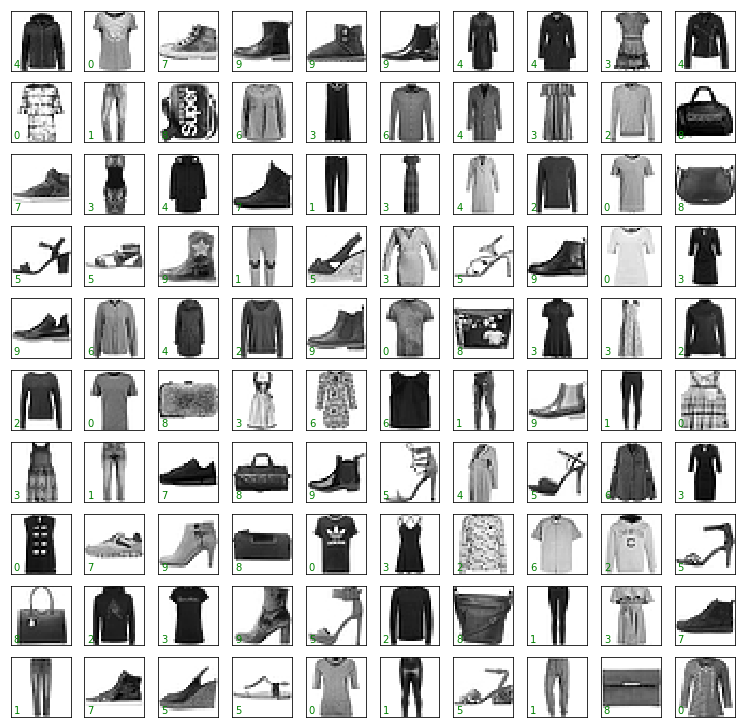

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, axes=plt.subplots(10,10,figsize=(13,13),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(fashion_mnist.train.images[i].reshape(28,28), cmap='binary')
    ax.text(0.05,0.05,(str(np.argmax(fashion_mnist.train.labels[i]))),transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [3]:
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))


print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [4]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [5]:

n_hidden_1 = 128 
n_hidden_2 = 128 
n_input = 784 
n_classes = 10 
n_samples = fashion_mnist.train.images 

In [6]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [n_x, None], name='X')
    Y = tf.placeholder(tf.float32, [n_y, None], name='Y')
    return X, Y

In [7]:
def initialize_parameters():
    tf.set_random_seed(42)

    W1 = tf.get_variable("W1", [n_hidden_1, n_input], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b1 = tf.get_variable("b1", [n_hidden_1, 1], initializer=tf.zeros_initializer())
    
    
    W2 = tf.get_variable("W2", [n_hidden_2, n_hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b2 = tf.get_variable("b2", [n_hidden_2, 1], initializer=tf.zeros_initializer())
    
    
    W3 = tf.get_variable("W3", [n_classes, n_hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b3 = tf.get_variable("b3", [n_classes, 1], initializer=tf.zeros_initializer())
    
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    
    return parameters

In [8]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Carry out forward propagation      
    Z1 = tf.add(tf.matmul(W1,X), b1)     
    A1 = tf.nn.relu(Z1)                  
    Z2 = tf.add(tf.matmul(W2,A1), b2)    
    A2 = tf.nn.relu(Z2)                  
    Z3 = tf.add(tf.matmul(W3,A2), b3)    
    
    return Z3

In [9]:
def compute_cost(Z3, Y):     
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

In [10]:
def model(train, test, learning_rate=0.0001, num_epochs=16, minibatch_size=32, print_cost=True, graph_filename='costs'):
    # Ensure that model can be rerun without overwriting tf variables
    ops.reset_default_graph()
    
    tf.set_random_seed(42)
    seed = 42
    
    (n_x, m) = train.images.T.shape
    n_y = train.labels.T.shape[0]
    
    costs = []
    
    
    X, Y = create_placeholders(n_x, n_y)
    # Initialize parameters
    parameters = initialize_parameters()
    
    
    Z3 = forward_propagation(X, parameters)
    
    cost = compute_cost(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    
    init = tf.global_variables_initializer()
    
    
    with tf.Session() as sess:
        
        
        sess.run(init)
        
        
        for epoch in range(num_epochs):
            
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            
            for i in range(num_minibatches):
                
                
                minibatch_X, minibatch_Y = train.next_batch(minibatch_size)
                
                # Execute optimizer and cost function
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})
                
                # Update epoch cost
                epoch_cost += minibatch_cost / num_minibatches
                
            # Print the cost every epoch
            if print_cost == True:
                print("Cost after epoch {epoch_num}: {cost}".format(epoch_num=epoch, cost=epoch_cost))
                costs.append(epoch_cost)
        
        
        plt.figure(figsize=(16,5))
        plt.plot(np.squeeze(costs), color='#2A688B')
        plt.xlim(0, num_epochs-1)
        plt.ylabel("cost")
        plt.xlabel("iterations")
        plt.title("learning rate = {rate}".format(rate=learning_rate))
        plt.savefig(graph_filename, dpi=300)
        plt.show()
        
       
        parameters = sess.run(parameters)
        print("Parameters have been trained!")
        
        
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        # Calculate accuracy on test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print ("Train Accuracy:", accuracy.eval({X: train.images.T, Y: train.labels.T}))
        print ("Test Accuracy:", accuracy.eval({X: test.images.T, Y: test.labels.T}))
        
        return parameters

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Cost after epoch 0: 0.5193707477843446
Cost after epoch 1: 0.3766206150898339
Cost after epoch 2: 0.33893657137441413
Cost after epoch 3: 0.31316337117337617
Cost after epoch 4: 0.2922237756379102
Cost after epoch 5: 0.27835127730703113
Cost after epoch 6: 0.2653705361911783
Cost after epoch 7: 0.25375490481569507
Cost after epoch 8: 0.24230903690589778
Cost after epoch 9: 0.23412952327621597
Cost after epoch 10: 0.22192650061855354
Cost after epoch 11: 0.2172257188182844
Cost after epoch 12: 0.2065555304321391
Cost after epoch 13: 0.20028436925409676
Cost after epoch 14: 0.19194246300445192
Cost after epoch 15: 0.18638945170824558


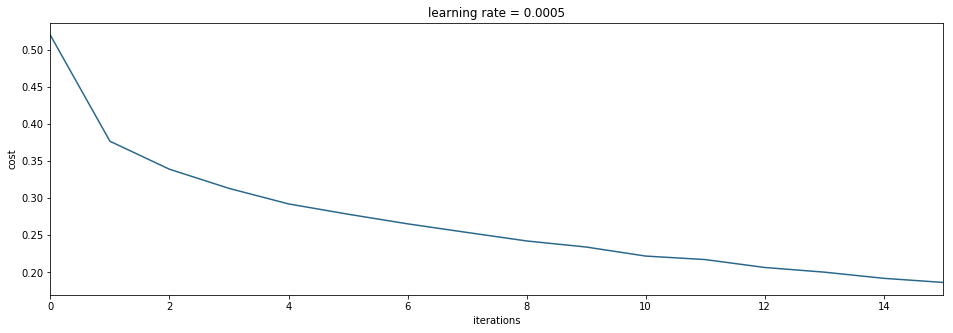

Parameters have been trained!
Train Accuracy: 0.94061816
Test Accuracy: 0.8922


In [11]:

train = fashion_mnist.train
test = fashion_mnist.test

parameters = model(train, test, learning_rate=0.0005)